In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt

**Задаём краевые условия**

In [47]:
def k(x):
    return 1 + x**2

def q(x):
    return 2 + x

def f(x):
    return math.cos(x)

delta1 = 100
delta2 = 0
eps1 = 0
eps2 = 0

**Вспомогательные переменные**

In [63]:
def k_til(x): return k(0.5)
def q_til(x): return q(0.5)
def f_til(x): return f(0.5)

x_num = 0.5

points = 21

h = (x_finish - x_start) / (points - 1)


lambda1 = math.sqrt(q(x_num) / k(x_num))
lambda2 = -lambda1

**Ф-я для рисования**

In [64]:
def draw(x, y_s, who):
    if who == "dyn":
        for i in range(len(y_s)):
            plt.plot(x[i], y_s[i], label='y'+str(10*2**i+1))
            plt.xlabel('x')
            plt.ylabel('y')
    elif who == 'const':
        plt.plot(x[0], y_s[0], label='analytic')
        plt.plot(x[0], y_s[1], label='progonka')
        plt.xlabel('x')
        plt.ylabel('y')
    else:
        plt.plot(x, y_s, label = 'log(err)')
        plt.xlabel('log(h)')
        plt.ylabel('log(err)')
    plt.grid(True)
    plt.legend()
    plt.show()

**Аналитическое решение**

In [65]:
def analytic(x):
    c1 = ((k(x_num) * lambda2 + delta2) * (delta1 * f(x_num) - eps1 * q(x_num)) * math.exp(lambda2) + (
            k(x_num) * lambda2 - delta1) * (delta2 * f(x_num) - eps2 * q(x_num))) / \
         (q(x_num) * ((k(x_num) * lambda1 - delta1) * (k(x_num) * lambda2 + delta2) * math.exp(lambda2) - (
                 k(x_num) * lambda2 - delta1) * (k(x_num) * lambda1 + delta2) * math.exp(lambda1)))

    c2 = ((k(x_num) * lambda1 + delta2) * (delta1 * f(x_num) - eps1 * q(x_num)) * math.exp(lambda1) + (
            k(x_num) * lambda1 - delta1) * (delta2 * f(x_num) - eps2 * q(x_num))) / \
         (q(x_num) * ((k(x_num) * lambda2 - delta1) * (k(x_num) * lambda1 + delta2) * math.exp(lambda1) - (
                 k(x_num) * lambda2 + delta2) * (k(x_num) * lambda1 - delta1) * math.exp(lambda2)))

    y = []

    for i in x:
        y.append(c1 * np.exp(lambda1 * i) + c2 * np.exp(lambda2 * i) + f(x_num) / q(x_num))

    print('Значения С для аналитики:\nС1 = {}, C2 = {}'.format(c1, c2))
    return y

**Метод прогонки**

In [66]:
def method_progonki(k, q, f, x):
    
    a = [0] * points
    b = [0] * points
    alpha = [0] * points
    beta = [0] * points
    c = [0] * points
    d = [0] * points
    u = [0] * points

    a[0] = k(x[0])
    b[0] = -(k(x[0]) + h * delta1)
    c[0] = 0
    d[0] = -eps1 * h
    alpha[0] = -(a[0] / b[0])
    beta[0] = d[0] / b[0]

    for i in range(1, points - 1):
        a[i] = k(x[i] + 1 / 2 * h)
        b[i] = -(k(x[i] - 1 / 2 * h) + k(x[i] + 1 / 2 * h) + q(x[i]) * (h ** 2))
        c[i] = k(x[i] - 1 / 2 * h)
        d[i] = -f(x[i]) * (h ** 2)
        alpha[i] = -a[i] / (b[i] + c[i] * alpha[i - 1])
        beta[i] = (d[i] - c[i] * beta[i - 1]) / (b[i] + c[i] * alpha[i - 1])

    a[-1] = 0
    b[-1] = -(k(x[-1]) + h * delta2)
    c[-1] = k(x[-1])
    d[-1] = -eps2 * h
    u[-1] = (d[-1] - c[-1] * beta[-2]) / (b[-1] + c[-1] * alpha[-2])

    for i in range(points - 2, -1, -1):
        u[i] = alpha[i] * u[i + 1] + beta[i]

    return u

Значения С для аналитики:
С1 = -0.019287278234594005, C2 = -0.3263181561267746


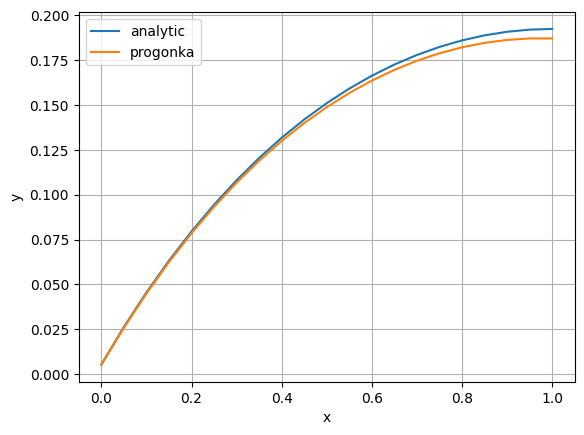

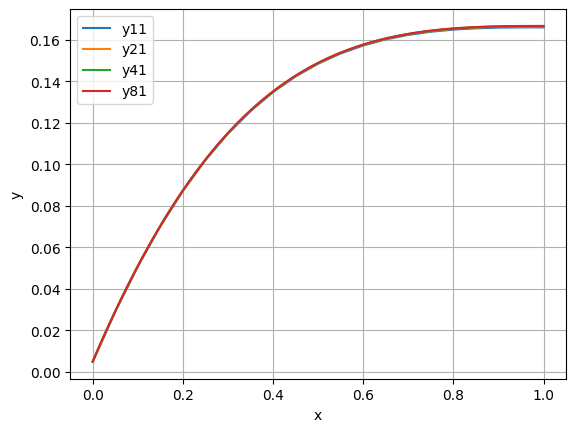

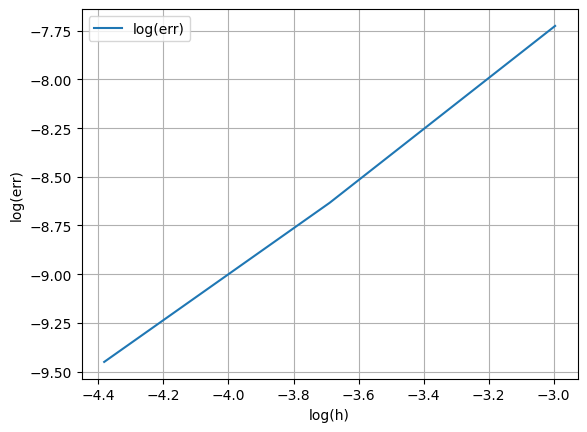

Порядок аппроксимации: 1.3105797829189973


In [67]:
x_start = 0
x_finish = 1

x = []
x.append(list(np.linspace(x_start, x_finish, points)))

y = analytic(x[0])
u_const = method_progonki(k_til, q_til, f_til, x[0])

array = []
array.append(y)
array.append(u_const)

draw(x, array, 'const')

u_dynamic = []
delta_e = 10**3
need_e = 10**(-4)
h_prev = 1
max_diff = 100
log_e = []
log_h = []

while max_diff > need_e:
    new_u = method_progonki(k, q, f, x[len(u_dynamic)])
    u_dynamic.append(new_u)
    if len(u_dynamic) > 1:
        max_diff = 0
        for i in range(0, len(u_dynamic[-2])):#(len(u_dynamic[-2]) - 1)//(10)):
            max_diff = max(max_diff, abs(u_dynamic[-2][i] - u_dynamic[-1][2*i]))
        
        log_h.append(math.log(h_prev))
        log_e.append(math.log(max_diff))
        
    points = (points - 1) * 2 + 1
    x_new = np.linspace(x_start, x_finish, points)
    x.append(x_new)
    h_prev = h
    h = (x_finish - x_start) / (points - 1)

draw(x, u_dynamic, 'dyn')
draw(log_h, log_e, 'err')
print('Порядок аппроксимации:', (log_e[0] - log_e[1])/(log_h[0] - log_h[1]))